In [1]:
%load_ext manim
from manim import *

Manim Community v0.18.0

The manim module is not an IPython extension.


### NetworkX Teil

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


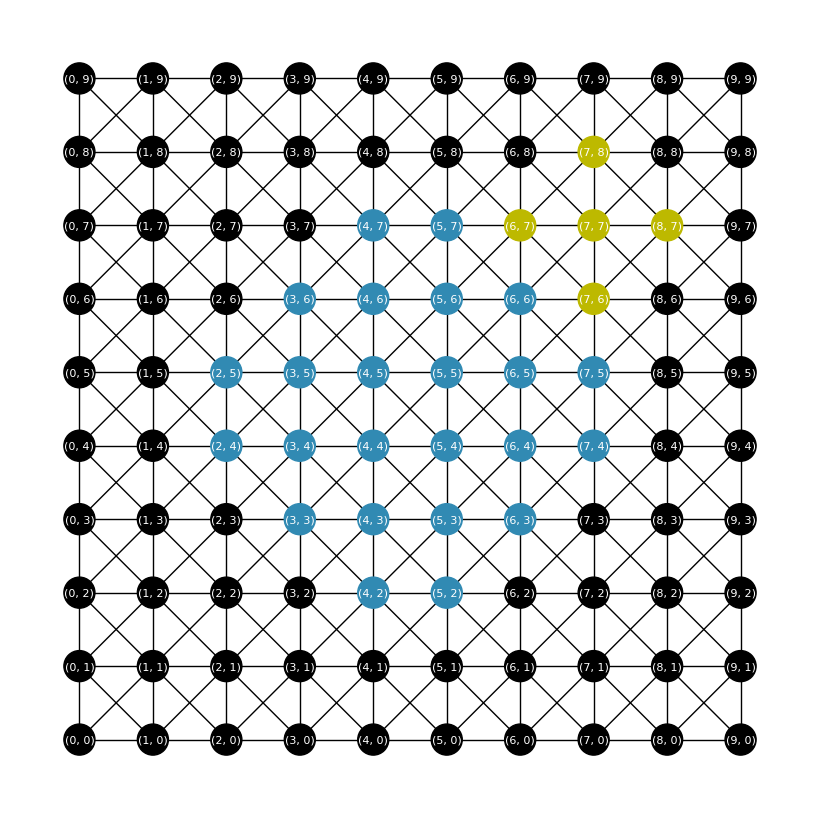

In [3]:
# Create a new graph
G = nx.Graph()

# Add nodes and edges for a 10x10 grid, including diagonal connections
y = 10
x = 10
for i in range(x):
    for j in range(y):
        # Add node
        G.add_node((i, j))

        # Add edges to neighboring nodes (including diagonals)
        if i > 0:
            G.add_edge((i, j), (i - 1, j))  # Edge to the left
            if j > 0:
                G.add_edge((i, j), (i - 1, j - 1))  # Diagonal left-top
            if j < 9:
                G.add_edge((i, j), (i - 1, j + 1))  # Diagonal left-bottom
        if j > 0:
            G.add_edge((i, j), (i, j - 1))  # Edge to the top
        if i < 9:
            G.add_edge((i, j), (i + 1, j))  # Edge to the right
            if j > 0:
                G.add_edge((i, j), (i + 1, j - 1))  # Diagonal right-top
            if j < 9:
                G.add_edge((i, j), (i + 1, j + 1))  # Diagonal right-bottom
        if j < 9:
            G.add_edge((i, j), (i, j + 1))  # Edge to the bottom

# Define positions for the nodes in the graph
pos = {(i, j): (i, j) for i in range(10) for j in range(10)}

# Define nodes for Moon and Earth
moon_nodes = [(7,8), (6,7), (7,7), (8,7), (7,6)]
earth_nodes = [(5,7), (4,7), (3,6), (4,6), (5,6), (6,6), (2,5), (3,5), (4,5), (5,5), (6,5), (7,5), 
               (2,4), (3,4), (4,4), (5,4), (6,4), (7,4), (3,3), (4,3), (5,3), (6,3), (4,2), (5,2)]
space_nodes = [node for node in G.nodes() if node not in earth_nodes or node not in moon_nodes]

# Set colors for each node
node_colors = []
for node in G.nodes():
    if node in moon_nodes:
        node_colors.append('#bdb900')  # Color for Moon
    elif node in earth_nodes:
        node_colors.append('#318ab3')  # Color for Earth
    else:
        node_colors.append('black')  # Default color

# Plot the graph with diagonal connections
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', font_color='white', node_size=500, font_size=8)
plt.gca().set_facecolor('grey')
plt.show()


In [4]:
config.media_embed = True
config.tex_compiler = None

### Manim


In [5]:
%load_ext manim

The manim module is not an IPython extension.


### Mathe

In [6]:
erde_rgb = (49,138,179)
mond_rgb = (189,185,0)
space_rgb = (104,34,139)

# Definieren der Punkte als Numpy-Arrays
erde_rgb_np = np.array(list(erde_rgb))
mond_rgb_np = np.array(list(mond_rgb))
space_rgb_np = np.array(list(space_rgb))

# Dissimilaritys (Unähnlichkeiten) berechnen
px_diss_m_e =np.sqrt(np.sum((mond_rgb_np - erde_rgb_np)**2))
px_diss_m_s =np.sqrt(np.sum((mond_rgb_np - space_rgb_np)**2))
px_diss_e_s =np.sqrt(np.sum((erde_rgb_np - space_rgb_np)**2))

#Affinitäten (Verwandschaft) berechnen
q = 2 # Beispielwert für q

px_aff_m_e = np.exp(-1/(2*q**2) * px_diss_m_e)
px_aff_m_s = np.exp(-1/(2*q**2) * px_diss_m_s)
px_aff_e_s = np.exp(-1/(2*q**2) * px_diss_e_s)

#Runden

px_diss_m_e=np.round(px_diss_m_e, decimals=2)
px_diss_m_s=np.round(px_diss_m_s, decimals=2)
px_diss_e_s=np.round(px_diss_e_s, decimals=2)


### Werte Graph

In [7]:
class TextScene(Scene):
    def construct(self):
        # Erster Teil: Bildszene
        image = ImageMobject("../Bilder/Alles.png")
        image.move_to(ORIGIN)
        image.shift(RIGHT*2).scale(0.7)
        
    

        # Vorbereitung für den Graphen (versteckt)
        # Konvertiere die 2D-Koordinaten in 3D-Koordinaten für Manim
        pos_3d = {node: (x, y, 0) for node, (x, y) in pos.items()}

        # Definiere die Farben für jeden Knoten
        node_colors = {node: ('#bdb900' if node in moon_nodes else 
                              '#318ab3' if node in earth_nodes else 
                              '#68228B') for node in G.nodes()}

        # Konfiguration für die Knoten
        vertex_config = {
            node: {"radius": 0.2, "color": node_colors[node]}
            for node in G.nodes()
        }
        
        # Konfiguration für die Kanten
        edge_config = {
            edge: {"stroke_color": "#666666"}
            for edge in G.edges()
        }

        # Erstelle einen Manim-Graphen aus dem networkx-Graphen
        m_graph = Graph(list(G.nodes), list(G.edges), layout=pos_3d, layout_scale=1, labels=False, 
                        vertex_config=vertex_config, edge_config=edge_config)
        m_graph.move_to(ORIGIN)

        m_graph.shift(RIGHT*2).scale(0.01)
        
        
        
        
        # Zentriere den Graphen in der Szene
        
        # Erstelle den Text
        text = Text("How does this help us?").scale(0.8)
        # Erstelle einzelne Textteile
        r = Text("R", font_size=64, color=RED)
        g = Text("G", font_size=64, color=GREEN).next_to(r, RIGHT*0.4)
        b = Text("B", font_size=64, color=BLUE).next_to(g, RIGHT*0.4)

        # Kombiniere die Textteile in einer Gruppe
        combined_text = VGroup(r, g, b).scale(0.6)
        combined_text.move_to(ORIGIN)
        combined_text.shift(UP*2.5)
        # Erstelle drei Punkte
        dot1 = Dot(color='#bdb900').shift(UP).scale(2)
        dot2 = Dot(color='#318ab3').scale(2)
        dot3 = Dot(color='#68228B').shift(DOWN).scale(2)

        # Erstelle Beschriftungen für jeden Punkt
        label1 = Text(f"🌕{mond_rgb}").next_to(dot1, RIGHT*0.3).scale(0.8)
        label2 = Text(f"🌍{erde_rgb}").next_to(dot2, RIGHT*0.3).scale(0.8)
        label3 = Text(f"🌌{space_rgb}").next_to(dot3, RIGHT*0.3).scale(0.8)
        
        # Füge Punkte und Beschriftungen zur Szene hinzu und spiele die Animation
        #self.add(dot1, dot2, dot3, label1, label2, label3)

        # Zentriere den Text in der Szene und spiele die Animation
        self.play(Write(text))
        self.wait(2)
        # Bewege den Text nach oben als Überschrift
        self.play(text.animate.to_edge(UP))
        self.wait(3)
        self.play(FadeIn(combined_text))
        self.wait(3)
        self.play(FadeIn(dot1), FadeIn(dot2), FadeIn(dot3), Write(label1), Write(label2), Write(label3))
        self.wait(4)
        self.play(dot1.animate.to_edge(LEFT), dot2.animate.to_edge(LEFT), dot3.animate.to_edge(LEFT),
                  label1.animate.shift(LEFT * 6.7), label2.animate.shift(LEFT * 6.7), label3.animate.shift(LEFT * 6.7))
        self.play(FadeOut(dot1), FadeOut(dot2), FadeOut(dot3))
        self.wait(1)
        self.add(image)
        self.play(FadeIn(image),FadeOut(combined_text))
        self.wait(2)
        
        self.add(m_graph)

        # Übergang: Blende das Bild aus und zoome gleichzeitig in den Graphen
        self.play(
            FadeOut(image),
            m_graph.animate.scale(50),  # Zoome in den Graphen
            run_time=2
        )

        # Zeige den Graphen
        #self.play(Create(m_graph))
        self.wait(5)

In [8]:
%manim -pql TextScene

[02/25/24 15:55:25] INFO     Animation 0 : Partial movie file written in                   ]8;id=895039;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=113834;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\1185818338                         
                             _889895057_223132457.mp4'                                                             

[02/25/24 15:55:26] INFO     Animation 1 : Partial movie file written in                   ]8;id=38143;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=605422;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             634017564_1915618546.mp4'                                                             

[02/25/24 15:55:27] INFO     Animation 2 : Partial movie file written in                   ]8;id=746491;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=815202;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             4214648496_2746500619.mp4'                                                            

                    INFO     Animation 3 : Partial movie file written in                   ]8;id=618633;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=895735;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             4071659840_3269963937.mp4'                                                            

[02/25/24 15:55:28] INFO     Animation 4 : Partial movie file written in                   ]8;id=754535;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=628187;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             637719120_260034707.mp4'                                                              

                    INFO     Animation 5 : Partial movie file written in                   ]8;id=49207;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=967459;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             4071659840_1338997281.mp4'                                                            

[02/25/24 15:55:31] INFO     Animation 6 : Partial movie file written in                   ]8;id=805399;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=763525;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             1792151541_3560552090.mp4'                                                            

[02/25/24 15:55:32] INFO     Animation 7 : Partial movie file written in                   ]8;id=25368;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=126296;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             3142055959_3902849123.mp4'                                                            

[02/25/24 15:55:34] INFO     Animation 8 : Partial movie file written in                   ]8;id=940452;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=468857;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             3761934906_457765844.mp4'                                                             

[02/25/24 15:55:36] INFO     Animation 9 : Partial movie file written in                   ]8;id=890386;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=303041;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             258728226_733025707.mp4'                                                              

[02/25/24 15:55:37] INFO     Animation 10 : Partial movie file written in                  ]8;id=332132;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=44638;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             2268332985_3300298938.mp4'                                                            

[02/25/24 15:55:40] INFO     Animation 11 : Partial movie file written in                  ]8;id=231372;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=571736;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             4117813753_1314538022.mp4'                                                            

[02/25/24 15:55:42] INFO     Animation 12 : Partial movie file written in                  ]8;id=604203;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=412802;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             1141282389_2625710967.mp4'                                                            

[02/25/24 15:56:08] INFO     Animation 13 : Partial movie file written in                  ]8;id=888815;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=366437;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             399557349_3588106491.mp4'                                                             

[02/25/24 15:56:11] INFO     Animation 14 : Partial movie file written in                  ]8;id=979100;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=170383;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\TextScene\624642324_                         
                             255102487_2368590530.mp4'                                                             

                    INFO     Combining to Movie file.                                      ]8;id=959403;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=138617;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

[02/25/24 15:56:12] INFO                                                                   ]8;id=104234;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=725692;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\TextScene.mp4'                                                   
                                                                                                                   

                    INFO     Rendered TextScene                                                        ]8;id=903110;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=367902;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 15 animations                                                                  

                    INFO     Previewed File at:                                                     ]8;id=360633;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=408022;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media\videos\L                
                             ukas\480p15\TextScene.mp4'                                                            

### Dissimilaritys

In [9]:
def zweier_graph(left_color, right_color, edge_color):
    # Definiere die Positionen der Knoten
    pos = {1: LEFT, 2: RIGHT}

    # Definiere die Farben für jeden Knoten
    node_colors = {1: left_color, 2: right_color}

    # Konfiguration für die Knoten
    vertex_config = {
        1: {"fill_color": node_colors[1],"radius": 0.3},
        2: {"fill_color": node_colors[2],"radius": 0.3}
    }

    # Konfiguration für die Kanten
    edge_config = {
        (1, 2): {"stroke_color": edge_color, "stroke_width": 7}
    }

    # Erstelle einen Manim-Graphen
    m_graph = Graph([1, 2], [(1, 2)], layout=pos, vertex_config=vertex_config, edge_config=edge_config)
    return m_graph


In [10]:
def create_label(graph,number, radius, label_color= WHITE):
    for edge, edge_obj in graph.edges.items():
        white_circle = Circle(color=label_color, fill_opacity=1, radius=radius)
        black_number = MathTex(str(number), color=BLACK).scale(0.65)
        label = VGroup(white_circle, black_number)
        label.next_to(edge_obj.get_center(), buff=-0.2)
    """
    Diese Funktion erstellt ein Label, bestehend aus einem weißen Kreis und einer schwarzen Zahl.
    
    Parameter:
    - number: Die Zahl, die im Label angezeigt werden soll.
    - radius: Der Radius des weißen Kreises im Label.
    
    Rückgabewert:
    Eine VGroup, die den weißen Kreis und die schwarze Zahl enthält, um ein Label darzustellen.
    """
    return label
    

In [11]:
# class Test(Scene):
#     def construct(self):

SyntaxError: incomplete input (3081947013.py, line 2)

In [12]:
class Dissimilaritys(Scene):
    def construct(self):
        # Text erstellen und anzeigen
        text = Text("How are the edges calculated?").scale(0.8)
        self.play(Write(text))
        self.wait(1)

        # Text nach oben verschieben
        self.play(text.animate.shift(UP * 3))
        
        # Erstelle die Graphen
        G1 = zweier_graph("#bdb900", "#318ab3","#666666")
        G2 = zweier_graph("#bdb900", "#68228B","#666666")
        G3 = zweier_graph("#68228B", "#318ab3","#666666")
        G4 = zweier_graph("#68228B", "#68228B","#68228B")
        
        # Positioniere die Graphen vertikal gestaffelt
        G1.shift(UP * 1)  # Optional, falls Sie möchten, dass G1 näher am Text ist
        G2.next_to(G1, DOWN, buff=0.5)  # Positioniert G2 unter G1
        G3.next_to(G2, DOWN, buff=0.5)
        G4.next_to(G3, DOWN, buff=0.5)  # Positioniert G3 unter G2
        G4.shift(RIGHT * 4)
        
        G_Group = VGroup(G1, G2, G3)
        # Füge alle Graphen gleichzeitig zur Szene hinzu und blende sie ein
        self.play(FadeIn(G_Group))
        self.wait(2)
        # Verschiebe die Graphen nach rechts
        self.play(
            G1.animate.shift(RIGHT * 4),
            G2.animate.shift(RIGHT * 4),
            G3.animate.shift(RIGHT * 4)
        )
        label1 = create_label(G1,"?",0.2)
        label2 = create_label(G2,"?",0.2)
        label3 = create_label(G3,"?",0.2)
        label4 = create_label(G4,"?",0.2)
        label_g=VGroup(label1,label2,label3)
        self.play(FadeIn(label_g))
        self.wait(2)
        text_dis = Text("Dissimilarity").scale(0.7)
        
        # Text zur Szene hinzufügen
        self.play(Write(text_dis))
        self.wait(2)
        
        # Text verschieben
        self.play(text_dis.animate.shift(LEFT*3 + UP))
        self.wait(2)
        # formel_dis = Text("S(f_j,f_i)=sqrt((Sum_k(f_ik-f_jk))^2)").scale(0.6)
        formel_dis = MathTex("S(f_j, f_i) = \sqrt{\left(\sum_k (f_{ik} - f_{jk}))^2}").scale(0.6)
        formel_dis_b = Text("f - Features (color values of the nodes)").scale(0.5)
        formel_dis.shift(LEFT*3)
        formel_dis_b.next_to(formel_dis, DOWN, buff=0.5)
        self.play(Write(formel_dis),Write(formel_dis_b))
        # Lade das Bild als ImageMobject
        tom_v = ImageMobject("../Bilder/Einstieg/Verwirrt.png")
        
        # Skaliere das Bild nach Bedarf
        tom_v.scale(0.5) # Passt die Größe des Bildes an
        
        
        # Positioniere die Figur außerhalb des sichtbaren Bereichs (rechts unten)
        tom_v.to_edge(DOWN+RIGHT)
        tom_v.shift(DOWN*5)
        
        # Bewege die Figur leicht nach links gedreht ins Bild
        self.play(tom_v.animate.shift(UP*3.5))
        self.play(tom_v.animate.rotate(-0.3))

        self.wait(9)

        # f_1_1 = MarkupText(f"S(🌕,🌍)=sqrt((Sum_k(🌕-🌍))^2)").scale(0.6)
        f_1_1_a = Text("S(🌕,🌍)=").scale(0.6)
        f_1_1 = MathTex("\sqrt{\left(\sum_k({Moon} - {Earth}))^2}").scale(0.6).next_to(f_1_1_a,RIGHT*0.1)
        f_1_1_g =VGroup(f_1_1_a,f_1_1).shift(LEFT*1.5)
        f_1_2_a = Text("S(🌕,🌍)=").scale(0.6)

        f_1_2 = MathTex("\sqrt{\left(\sum_k("+str(mond_rgb)+" - "+str(erde_rgb)+"))^2}").scale(0.6).next_to(f_1_2_a,RIGHT*0.1)
        f_1_2 =VGroup(f_1_2_a,f_1_2).shift(LEFT*1.5)
        f_1_1_g.shift(LEFT*3)
        f_1_2.shift(LEFT*3)
        tom_h = ImageMobject("../Bilder/Einstieg/Happy.png")
        tom_h.scale(0.5).rotate(-0.3)
        tom_h.to_edge(DOWN+RIGHT)
        tom_h.shift(DOWN*5+UP*3.4+RIGHT*0.1)

        self.play(Transform(formel_dis,f_1_1_g),FadeOut(formel_dis_b),FadeTransform(tom_v,tom_h))
        
        self.wait(2)
        
        group_f1=VGroup(formel_dis,f_1_1,f_1_1_a)
        self.play(Transform(group_f1,f_1_2))
        self.wait(2)
        
        f_1_2_l = Text(f"={px_diss_m_e}").scale(0.6)
        f_1_2_l.next_to(f_1_2, RIGHT, buff=0.1).align_to(f_1_2, DOWN)
        
        self.play(Write(f_1_2_l),FadeOut(f_1_2_l),FadeOut(f_1_2),FadeOut(group_f1))
        
        f_1_2_e = Text(f"S(🌕,🌍)={px_diss_m_e}").scale(0.6)
        f_1_2_e.shift(LEFT*3)
        
        
        self.play(FadeIn(f_1_2_e))
        self.play(tom_h.animate.shift(DOWN*4))
        self.wait(2)
        f_2_a = Text("S(🌕,🌌)=").scale(0.6)
        f_2_a.next_to(f_1_2_e, DOWN, buff=0.5)
        f_2_a.shift(LEFT*2)
        f_2 = MathTex("\sqrt{\left(\sum_k("+str(mond_rgb)+" - "+str(space_rgb)+"))^2}").scale(0.6).next_to(f_2_a,RIGHT*0.1)
        f_3_a = Text("S(🌍,🌌)=").scale(0.6)
        f_3_a.next_to(f_2, DOWN, buff=0.5)
        f_3_a.shift(LEFT*3.5)
        f_3 = MathTex("\sqrt{\left(\sum_k("+str(erde_rgb)+" - "+str(space_rgb)+"))^2}").scale(0.6).next_to(f_3_a,RIGHT*0.1)

        
        
        gruppe_f_2_3 =VGroup(f_2_a,f_2,f_3_a,f_3)
        self.play(Write(gruppe_f_2_3))
        self.wait(2)
        f_2_e = Text(f"S(🌕,🌌)={px_diss_m_s}").scale(0.6)
        f_3_e = Text(f"S(🌍,🌌)={px_diss_e_s}").scale(0.6)
        f_4_e = Text(f"S(🌌,🌌)={0}").scale(0.6)
        
        f_2_e.next_to(f_1_2_e, DOWN, buff=0.5)
        f_3_e.move_to(LEFT*3).shift(DOWN*2)
        f_4_e.move_to(LEFT*3).shift(DOWN*3)

        gruppe_f_2_3_e =VGroup(f_2_e,f_3_e,f_4_e)
        self.play(Transform(gruppe_f_2_3,gruppe_f_2_3_e),FadeIn(G4),FadeIn(label4))
        self.wait(5)

In [14]:
%manim -pql Dissimilaritys

[02/25/24 16:06:37] INFO     Animation 0 : Partial movie file written in                   ]8;id=143323;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=3288;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\18241                         
                             21845_3799736798_223132457.mp4'                                                       

                    INFO     Animation 1 : Partial movie file written in                   ]8;id=111357;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=790561;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_2268332985_1387504059.mp4'                                                       

[02/25/24 16:06:39] INFO     Animation 2 : Partial movie file written in                   ]8;id=13542;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=731505;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_36461976_3140928271.mp4'                                                         

                    INFO     Animation 3 : Partial movie file written in                   ]8;id=419628;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=911071;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_3649771966_1156194531.mp4'                                                       

[02/25/24 16:06:40] INFO     Animation 4 : Partial movie file written in                   ]8;id=351627;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=473922;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_784179552_2136067122.mp4'                                                        

[02/25/24 16:06:41] INFO     Animation 5 : Partial movie file written in                   ]8;id=885947;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=642556;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_2401546713_2995725893.mp4'                                                       

[02/25/24 16:06:42] INFO     Animation 6 : Partial movie file written in                   ]8;id=103857;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=130953;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_536770515_2908242139.mp4'                                                        

[02/25/24 16:06:43] INFO     Animation 7 : Partial movie file written in                   ]8;id=133367;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=884849;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_634017564_4079347124.mp4'                                                        

[02/25/24 16:06:44] INFO     Animation 8 : Partial movie file written in                   ]8;id=723163;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=647840;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_3938041120_2227018177.mp4'                                                       

[02/25/24 16:06:45] INFO     Animation 9 : Partial movie file written in                   ]8;id=396343;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=292540;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_634017564_3908938508.mp4'                                                        

[02/25/24 16:06:47] INFO     Animation 10 : Partial movie file written in                  ]8;id=80811;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=331951;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_3161600146_2044685047.mp4'                                                       

[02/25/24 16:06:48] INFO     Animation 11 : Partial movie file written in                  ]8;id=614424;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=356535;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_784179552_3324157585.mp4'                                                        

[02/25/24 16:06:52] INFO     Animation 12 : Partial movie file written in                  ]8;id=153715;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=68939;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_2689871284_2763270123.mp4'                                                       

[02/25/24 16:06:56] INFO     Animation 13 : Partial movie file written in                  ]8;id=950594;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=429412;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_2403798367_2751136053.mp4'                                                       

[02/25/24 16:06:59] INFO     Animation 14 : Partial movie file written in                  ]8;id=833736;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=661203;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_3979916282_2751136053.mp4'                                                       

[02/25/24 16:07:02] INFO     Animation 15 : Partial movie file written in                  ]8;id=882071;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=946885;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_3980001892_1275570400.mp4'                                                       

[02/25/24 16:07:20] INFO     Animation 16 : Partial movie file written in                  ]8;id=986193;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=641696;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_2262973262_4218618956.mp4'                                                       

[02/25/24 16:07:25] INFO     Animation 17 : Partial movie file written in                  ]8;id=549971;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=549976;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_634017564_2042441466.mp4'                                                        

[02/25/24 16:09:19] INFO     Animation 18 : Partial movie file written in                  ]8;id=883072;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=696890;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_2711808391_1953614141.mp4'                                                       

[02/25/24 16:09:31] INFO     Animation 19 : Partial movie file written in                  ]8;id=458219;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=669415;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_784179552_1998066739.mp4'                                                        

[02/25/24 16:10:26] INFO     Animation 20 : Partial movie file written in                  ]8;id=132764;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=888095;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_780737257_3413604274.mp4'                                                        

[02/25/24 16:10:28] INFO     Animation 21 : Partial movie file written in                  ]8;id=987588;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=222121;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_3766302161_3310298873.mp4'                                                       

[02/25/24 16:10:31] INFO     Animation 22 : Partial movie file written in                  ]8;id=935720;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=956689;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_1674513648_1613463059.mp4'                                                       

[02/25/24 16:10:32] INFO     Animation 23 : Partial movie file written in                  ]8;id=932211;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=268461;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_1141282389_1717585314.mp4'                                                       

                    INFO     Writing \sqrt{\big(\sum_k((189, 185, 0) - (104, 34, 139)))^2}  ]8;id=293283;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=103547;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py#107\107]8;;\
                             to media\Tex\9d1411f520a04a4e.tex                                                     

[02/25/24 16:10:35] INFO     Writing \sqrt{\big(\sum_k((49, 138, 179) - (104, 34, 139)))^2} ]8;id=143346;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=227236;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py#107\107]8;;\
                             to media\Tex\d66d5316f87652b3.tex                                                     

[02/25/24 16:10:43] INFO     Animation 24 : Partial movie file written in                  ]8;id=172202;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=423364;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_1802174461_4020562138.mp4'                                                       

[02/25/24 16:10:44] INFO     Animation 25 : Partial movie file written in                  ]8;id=812805;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=104352;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_1141282389_1320705292.mp4'                                                       

[02/25/24 16:11:21] INFO     Animation 26 : Partial movie file written in                  ]8;id=989433;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=492752;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_2009112321_1399107926.mp4'                                                       

[02/25/24 16:11:27] INFO     Animation 27 : Partial movie file written in                  ]8;id=569974;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=581492;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Dissimilaritys\62464                         
                             2324_1815950923_519228586.mp4'                                                        

                    INFO     Combining to Movie file.                                      ]8;id=812918;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=227652;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=381415;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=680428;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\Dissimilaritys.mp4'                                              
                                                                                                                   

                    INFO     Rendered Dissimilaritys                                                   ]8;id=617547;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=953692;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 28 animations                                                                  

                    INFO     Previewed File at:                                                     ]8;id=681655;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=679742;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media\videos\L                
                             ukas\480p15\Dissimilaritys.mp4'                                                       

### Affinity

In [15]:
class Affinity(Scene):
    def construct(self):
        text = Text("How are the edges calculated?").scale(0.8).shift(UP * 3)
        self.add(text)
        self.wait(4)      
        text_aff = Text("Affinity").scale(0.7)
        text_aff.shift(UP*1.5)
        self.play(Write(text_aff))
        self.wait(2)
        formel_aff = MathTex(r"w(i,j)=e^{\left(-\frac{1}{2\sigma^2}S(f_i,f_j))}").scale(0.6)
        formel_aff_b = Text("⬆️ the dissimilarity, the ⬇️ the affinity").scale(0.5)
        formel_aff_b.next_to(formel_aff, DOWN, buff=0.5)
        self.play(Write(formel_aff),Write(formel_aff_b))
        self.wait(7)

        # Texte erstellen
        text_o1 = Text("o=1", color=RED).scale(0.6).next_to(formel_aff_b, DOWN, buff=0.5)
        text_o2 = Text("o=2", color=GREEN).scale(0.6).next_to(text_o1, DOWN, buff=0.5)
        text_o3 = Text("o=4", color=BLUE).scale(0.6).next_to(text_o2, DOWN, buff=0.5)

        # Texte nach links verschieben
        self.play(Write(text_o1),Write(text_o2),Write(text_o3))
        self.play(
            text_o1.animate.shift(LEFT*3),
            text_o2.animate.shift(LEFT*3),
            text_o3.animate.shift(LEFT*3),
            formel_aff.animate.shift(LEFT*3),
            formel_aff_b.animate.shift(LEFT*3),
            text_aff.animate.shift(LEFT*3),
        )

        # Achsen erstellen, skalieren und nach links verschieben
        axes = Axes(x_range=[0, 10], y_range=[0, 1], axis_config={"color": WHITE}).scale(0.4).shift(RIGHT*3.2)
        self.play(Create(axes))

        # Funktionen definieren und Graphen zeichnen mit angepasster Positionierung
        graph_o1 = axes.plot(lambda x: np.exp((-1/(2*1**2)*x)), color=RED)
        graph_o2 = axes.plot(lambda x: np.exp((-1/(2*2**2)*x)), color=GREEN)
        graph_o3 = axes.plot(lambda x: np.exp((-1/(2*4**2)*x)), color=BLUE)

        self.play(Create(graph_o1), Create(graph_o2), Create(graph_o3))
        self.wait(8)
        test=""
        a_1 = MathTex(r"w(Moon,Earth)=e^{\left(-\frac{1}{2\ 2^2}S(f_i,f_j))"+str(px_diss_m_e)+")}}").scale(0.6).shift(LEFT*3)

        a_2 = MathTex(r"w(Moon,Space)=e^{\left(-\frac{1}{2\ 2^2}S(f_i,f_j))"+str(px_diss_m_s)+")})").scale(0.6)
        a_3 = MathTex(r"w(Earth,Space)=e^{\left(-\frac{1}{2\ 2^2}S(f_i,f_j))"+str(px_diss_e_s)+")})").scale(0.6)
        a_4 = MathTex(r"w(Earth,Space)=e^{\left(-\frac{1}{2\ 2^2}S(f_i,f_j))0)})").scale(0.6) 
        a_2.next_to(a_1, DOWN, buff=0.5)
        a_3.next_to(a_2, DOWN, buff=0.5)
        a_4.next_to(a_3, DOWN, buff=0.5)
        a_1_e = Text(f"w(🌕,🌍)={px_aff_m_e: .2e}").scale(0.6)
        a_1_e.shift(LEFT*3)
        a_2_e = Text(f"w(🌕,🌌)={px_aff_m_s: .2e}").scale(0.6)
        a_3_e = Text(f"w(🌍,🌌)={px_aff_e_s: .2e}").scale(0.6)
        a_4_e = Text(f"w(🌌,🌌)={1}").scale(0.6)
        a_2_e.next_to(a_1_e, DOWN, buff=0.5)
        a_3_e.next_to(a_2_e, DOWN, buff=0.5)
        a_4_e.next_to(a_3_e, DOWN, buff=0.5)
        self.play(Transform(formel_aff,a_1),FadeOut(formel_aff_b),FadeOut(text_o1),FadeOut(text_o2),FadeOut(text_o3))
        self.wait(2)
        self.play(FadeOut(a_1),FadeOut(formel_aff),Write(a_1_e))
        self.wait(2)
        self.play(Write(a_2),Write(a_3),Write(a_4))
        self.wait(2)
        self.play(Transform(a_2,a_2_e),Transform(a_3,a_3_e),Transform(a_4,a_4_e))
        self.wait(7)

        self.play(FadeOut(graph_o1), FadeOut(graph_o2), FadeOut(graph_o3), FadeOut(axes))

        # Erstelle die Graphen
        G1 = zweier_graph("#bdb900", "#318ab3","#666666")
        G2 = zweier_graph("#bdb900", "#68228B","#666666")
        G3 = zweier_graph("#68228B", "#318ab3","#666666")
        G4 = zweier_graph("#68228B", "#68228B","#68228B")
        
        
        # Positioniere die Graphen vertikal gestaffelt
        G1.shift(UP * 1 + RIGHT * 3)  # Optional, falls Sie möchten, dass G1 näher am Text ist
        G2.next_to(G1, DOWN, buff=0.5)  # Positioniert G2 unter G1
        G3.next_to(G2, DOWN, buff=0.5)
        G4.next_to(G3, DOWN, buff=0.5)  # Positioniert G3 unter G2
        label1 = create_label(G1,f"0",0.2)
        label2 = create_label(G2,f"0",0.2)
        label3 = create_label(G3,f"0",0.2)
        label4 = create_label(G4,"1",0.2)
        label_g=VGroup(label1,label2,label3,label4)
        G_Group = VGroup(G1, G2, G3, G4)
        
        # Füge alle Graphen gleichzeitig zur Szene hinzu und blende sie ein
        self.play(Create(G_Group))
        self.play(FadeIn(label_g))
        self.wait(2)
        

In [17]:
%manim -pql Affinity

[02/25/24 16:14:36] INFO     Animation 0 : Partial movie file written in                   ]8;id=969760;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=605727;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\1185818338_                         
                             3142055959_86713157.mp4'                                                              

[02/25/24 16:14:37] INFO     Animation 1 : Partial movie file written in                   ]8;id=542411;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=477446;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_3                         
                             305997378_2565329958.mp4'                                                             

[02/25/24 16:14:38] INFO     Animation 2 : Partial movie file written in                   ]8;id=177168;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=519014;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_1                         
                             141282389_1135294177.mp4'                                                             

                    INFO     Writing w(i,j)=e^{\big(-\frac{1}{2\sigma^2}S(f_i,f_j))} to     ]8;id=387011;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=991285;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py#107\107]8;;\
                             media\Tex\e9ca5c464febe83a.tex                                                        

[02/25/24 16:14:44] INFO     Animation 3 : Partial movie file written in                   ]8;id=663480;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=477514;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_5                         
                             64915788_2902825034.mp4'                                                              

[02/25/24 16:14:45] INFO     Animation 4 : Partial movie file written in                   ]8;id=989367;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=698521;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_4                         
                             31598770_1304019068.mp4'                                                              

[02/25/24 16:14:47] INFO     Animation 5 : Partial movie file written in                   ]8;id=423594;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=30766;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_2                         
                             004842931_2313779615.mp4'                                                             

[02/25/24 16:14:50] INFO     Animation 6 : Partial movie file written in                   ]8;id=661438;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=420308;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_2                         
                             470517195_790616775.mp4'                                                              

[02/25/24 16:14:51] INFO     Animation 7 : Partial movie file written in                   ]8;id=511145;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=930007;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_3                         
                             402487880_1415800870.mp4'                                                             

[02/25/24 16:14:53] INFO     Animation 8 : Partial movie file written in                   ]8;id=179884;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=359125;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_3                         
                             926311580_861166972.mp4'                                                              

[02/25/24 16:14:55] INFO     Animation 9 : Partial movie file written in                   ]8;id=437425;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=602454;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_1                         
                             563271232_3658374494.mp4'                                                             

                    INFO     Writing {w(Moon,Earth)=e^{\big(-\frac{1}{2\                    ]8;id=728260;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=953416;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py#107\107]8;;\
                             2^2}S(f_i,f_j))232.06)}} to media\Tex\f53835dad1c72979.tex                            

[02/25/24 16:14:57] INFO     Writing w(Moon,Space)=e^{\big(-\frac{1}{2\                     ]8;id=715000;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=581641;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py#107\107]8;;\
                             2^2}S(f_i,f_j))222.14)}) to media\Tex\c84031c5925814f6.tex                            

[02/25/24 16:14:59] INFO     Writing w(Earth,Space)=e^{\big(-\frac{1}{2\                    ]8;id=184769;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=411655;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py#107\107]8;;\
                             2^2}S(f_i,f_j))124.26)}) to media\Tex\cb2e1a62b6ecb366.tex                            

[02/25/24 16:15:01] INFO     Writing w(Earth,Space)=e^{\big(-\frac{1}{2\                    ]8;id=96124;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=351647;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py#107\107]8;;\
                             2^2}S(f_i,f_j))0)}) to media\Tex\6281c2c4de1078ca.tex                                 

[02/25/24 16:15:07] INFO     Animation 10 : Partial movie file written in                  ]8;id=582788;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=201061;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_6                         
                             32137592_421255838.mp4'                                                               

[02/25/24 16:15:08] INFO     Animation 11 : Partial movie file written in                  ]8;id=928029;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=614302;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_6                         
                             34017564_2720730690.mp4'                                                              

[02/25/24 16:15:11] INFO     Animation 12 : Partial movie file written in                  ]8;id=965852;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=298113;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_1                         
                             549819334_2513613992.mp4'                                                             

[02/25/24 16:15:12] INFO     Animation 13 : Partial movie file written in                  ]8;id=413096;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=138243;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_1                         
                             141282389_4069190546.mp4'                                                             

[02/25/24 16:15:16] INFO     Animation 14 : Partial movie file written in                  ]8;id=488941;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=307449;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_3                         
                             344930602_3263577009.mp4'                                                             

[02/25/24 16:15:18] INFO     Animation 15 : Partial movie file written in                  ]8;id=705356;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=640476;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_6                         
                             34017564_3032600029.mp4'                                                              

[02/25/24 16:16:22] INFO     Animation 16 : Partial movie file written in                  ]8;id=225436;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=730440;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_3                         
                             939446091_78094761.mp4'                                                               

[02/25/24 16:16:32] INFO     Animation 17 : Partial movie file written in                  ]8;id=864933;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=607003;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_1                         
                             946741890_194509443.mp4'                                                              

[02/25/24 16:16:54] INFO     Animation 18 : Partial movie file written in                  ]8;id=491505;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=150793;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_4                         
                             138899743_2581560349.mp4'                                                             

                    INFO     Writing 0 to media\Tex\ce14bce8a4b9ddee.tex                    ]8;id=912631;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=111099;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py#107\107]8;;\

[02/25/24 16:16:56] INFO     Writing 1 to media\Tex\3b7e741a76ee76a4.tex                    ]8;id=119794;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=274534;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\tex_file_writing.py#107\107]8;;\

[02/25/24 16:17:07] INFO     Animation 19 : Partial movie file written in                  ]8;id=185397;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=989023;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_3                         
                             815086608_2867106609.mp4'                                                             

[02/25/24 16:17:16] INFO     Animation 20 : Partial movie file written in                  ]8;id=434047;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=2155;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_4                         
                             88115877_1739698608.mp4'                                                              

[02/25/24 16:17:26] INFO     Animation 21 : Partial movie file written in                  ]8;id=276995;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=27955;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\partial_movie_files\Affinity\624642324_7                         
                             84179552_1832479847.mp4'                                                              

                    INFO     Combining to Movie file.                                      ]8;id=681203;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=191792;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=531172;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=584343;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media                         
                             \videos\Lukas\480p15\Affinity.mp4'                                                    
                                                                                                                   

                    INFO     Rendered Affinity                                                         ]8;id=107253;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=277195;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 22 animations                                                                  

[02/25/24 16:17:27] INFO     Previewed File at:                                                     ]8;id=26959;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=801729;file://c:\Users\Adrian\anaconda3\envs\visualization-manim\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             'C:\Users\Adrian\DHBW_Coding\Graph-Cuts-Animation\Lukas\media\videos\L                
                             ukas\480p15\Affinity.mp4'                                                             